In [2]:
#ignoring the warnings since tensor flow will give  a lot of them
import warnings
warnings.filterwarnings("ignore")

#import tensorflow
import tensorflow as tf

In [3]:
#MNIST dataset contains 28x28(pixcels) images of hand written numbers from 0 to 9

#loading the mnist dataset
mnist=tf.keras.datasets.mnist 


In [4]:
#Perform test train split
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [5]:
# Now lets see how the tensor actually looks
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

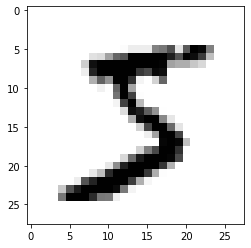

In [7]:
#Now lets plot it to show the image
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

# as we see in the image its a 28x28 graph and each unit is a pixcel

In [9]:
#Now we scale the DATA 

x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [10]:
# Now lets see how the tensor actually looks after normalization
print(x_train[0])

#So as we see here, all the values are brought in the range of (0,1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

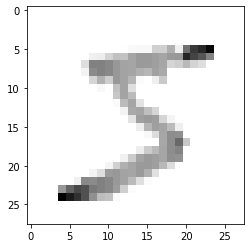

In [11]:
#Now lets plot it to show the image
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

#As we see here, the image gets lighter at spots of normalization. but the meaning and original shape remails intact

In [14]:
#Build the model

#selecting the model. ie sequential model in this case
model=tf.keras.models.Sequential()

# Creating the input layer. In this step, we flaten the tensor to ensure there are lesser dimensionality in the input
model.add(tf.keras.layers.Flatten())

# Add multiple hidden layers
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))

# Adding the final layer. final layer has number of neurons equal to nmber of classifications. In this case 10(0 to 9)
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
# Now we compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Now we fit the model. Epoch decides how many times the model will go through the dataset
model.fit(x_train, y_train, epochs=3)

#as we see below, with each epoch, accuracy increases and loss decreases

Epoch 1/3
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2669 - acc: 0.9211
Epoch 2/3
60000/60000 [==============================] - 10s 161us/sample - loss: 0.1091 - acc: 0.9660
Epoch 3/3
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0757 - acc: 0.9762


In [17]:
# Now we find the validation losses and the validation accuracy of the model

val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.0925 - acc: 0.9713
0.09254440529150888 0.9713


In [18]:
# Save the model for future use
model.save("model_name.model")

In [20]:
# To use this model
new_model_testing=tf.keras.models.load_model("model_name.model")

In [38]:
#Make prediction using  model
prediction=model.predict(x_test)

In [39]:
print(prediction)

# the predictions here are arrays of probability distributions. So we cannot make them out like this. hence we go for next step

[[5.07678299e-09 1.33634998e-07 6.67995323e-07 ... 9.99997139e-01
  1.96045025e-09 1.18083840e-07]
 [2.06105755e-09 4.35986323e-04 9.99497652e-01 ... 1.28445819e-07
  1.55345078e-05 1.62174885e-10]
 [1.71847262e-06 9.99063790e-01 9.17443103e-05 ... 3.42471496e-04
  2.17241715e-04 1.73716562e-05]
 ...
 [8.09777347e-08 1.02117006e-07 1.16270078e-08 ... 8.82907534e-06
  7.39741608e-07 2.28120422e-04]
 [5.24389634e-07 1.12544149e-06 1.53633820e-07 ... 1.14448071e-07
  2.56318040e-03 3.93460864e-09]
 [1.22068002e-06 4.71191575e-09 8.58230020e-09 ... 7.63213798e-12
  3.07058059e-08 8.51026805e-09]]


In [41]:
import numpy as np
# this list gives all predictions made
list2=[]

for i in prediction:
    list2.append(np.argmax(i))
    
print(list2)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 6, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [42]:
# now lets check for one of the predictions. say first value predicted

pred1=np.argmax(prediction[0])
print(pred1)

7


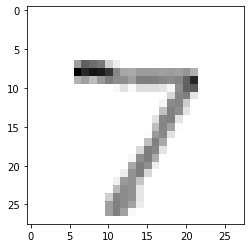

In [43]:
# now lets see actual image of this
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [ ]:
# so this has predicted accurately